<a href="https://colab.research.google.com/github/ask-kawade/Online-Retail-Customer-Segmentation-Clustering-/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
#imorting important libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# setting max display column limit to 30
pd.set_option("display.max_columns", 30)

#set style
# plt.style.use('seaborn')
sns.set()


# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path='/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECTS/Customer Segmentation/Copy of Online Retail.csv'

In [4]:
# Read The Datset "Online Retail"
# The DatFile sometime wont readable due to its containt for encoding do "encoding = ISO-8859-1"
# Use Panda Library To read The CSV file
# .head() helps to read top 5 record of dataset
retail_df=pd.read_csv(file_path,sep=",",encoding="ISO-8859-1")
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
# shape of dataset
retail_df.shape

(541909, 8)

# **Data Wrangling:**

In [6]:
# checking the datatypes and null values in dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### **Observations**
* ***Datatyep of InvoiceDate is object need to convert it into datatime.***
* ***If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.***
* ***There are null values in CustomerID and Description.***

In [7]:
# Let's check the null values count.
retail_df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

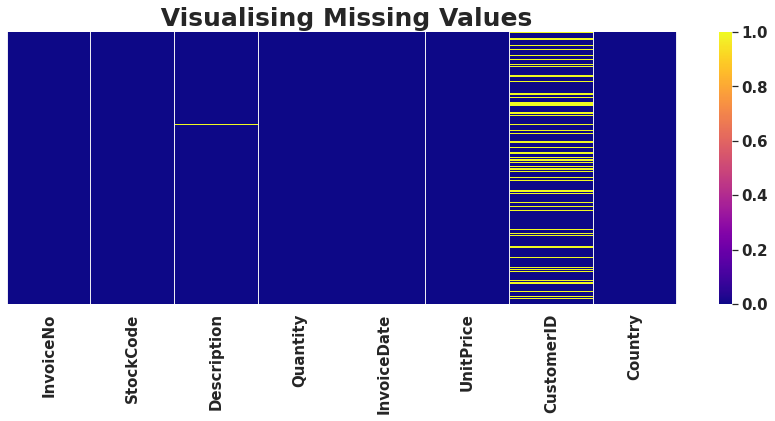

In [8]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(retail_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

## **Observations**
### ***Missing values in CustomerID and Description columns.***
### ***CustomerID is our identification feature so if its missing means other wont help us in analysis***
### ***Dropping that all missing datapoints***

In [9]:
retail_df.dropna(inplace=True)

In [10]:
retail_df.shape

(406829, 8)

***Our data got reduced.So we have 8 featurs and 406829 datapoints***

In [11]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


* ***Here we can see that min value for Quantity column is negative.***
* ***UnitPrice has 0 as min value***
* ***Need to Explore these columns***

In [12]:
# dataframe have negative valiues in quantity.
#Here we observed that Invoice number starting with C has negative values and as per description of the data those are cancelations. so we need to drop this entries.
retail_df[retail_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [13]:
# changing the datatype to str
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')

In [14]:
# also If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.
retail_df=retail_df[~retail_df['InvoiceNo'].str.contains('C')]

In [15]:
# Checking how many values are present for unitprice==0
# almost 40 values are present so will drop this values
len(retail_df[retail_df['UnitPrice']==0])

40

In [16]:
# taking unitprice values greater than 0.
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [17]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


# **Feature Engineering**

In [18]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 01-12-2010 08:26.
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%d-%m-%Y %H:%M")

In [19]:
# extracting month from the Invoice date
retail_df['Month']=retail_df['InvoiceDate'].dt.month_name()

In [20]:
# extracting day from the Invoice date
retail_df['Day']=retail_df['InvoiceDate'].dt.day_name()

In [21]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday


# **EDA(Exploratory Data Analysis)**

In [22]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month', 'Day'],
      dtype='object')

In [30]:
top_10_product=retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
top_10_product

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


## ***Top 10 items in terms of description(Name)***

Text(0.5, 1.0, 'Top 10 products')

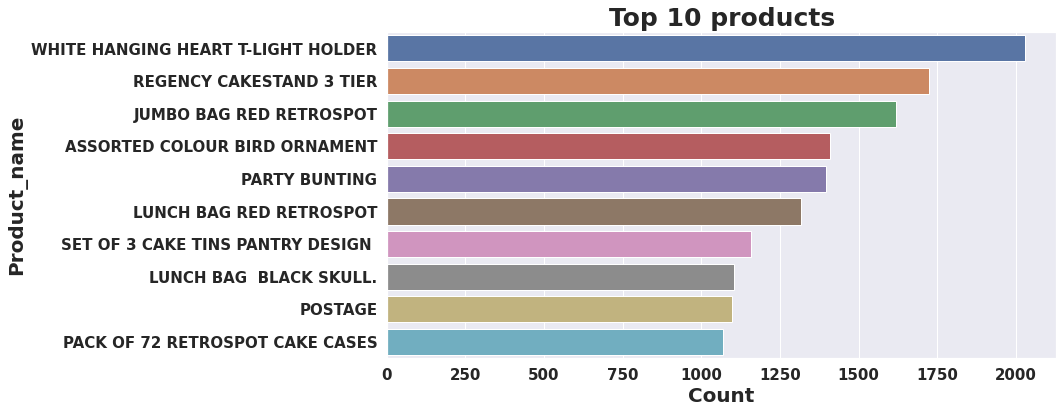

In [42]:
# top 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_product['Count'],y=top_10_product['Product_name'])
plt.title('Top 10 products')

## ***Bottom 10 items in terms of description(Name)***

In [44]:
bottom_10_product=retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).tail(10)
bottom_10_product

,Product_name,Count
3867,BLUE FELT HANGING HEART WITH FLOWER,1
3868,GLASS CAKE COVER AND PLATE,1
3869,CRACKED GLAZE EARRINGS RED,1
3870,SCALLOP SHELL SOAP DISH,1
3871,NECKLACE+BRACELET SET PINK DAISY,1
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


Text(0.5, 1.0, 'Bottom 10 products')

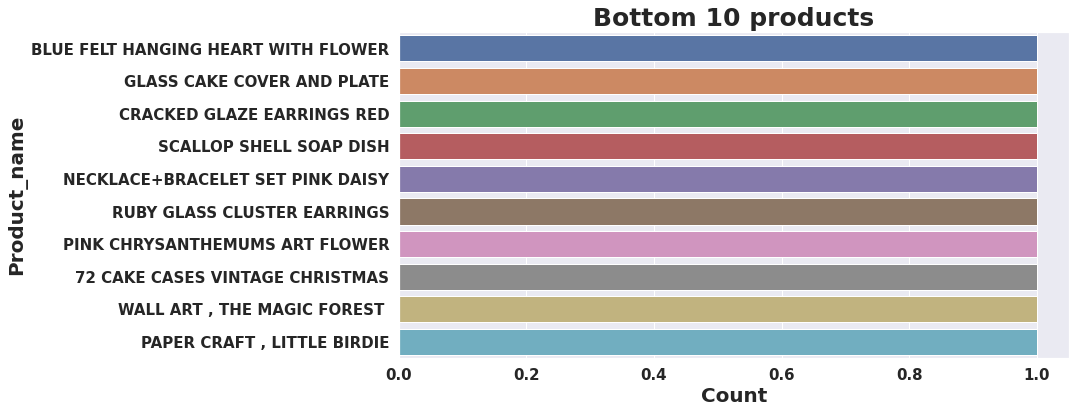

In [46]:
# bottom 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=bottom_10_product['Count'],y=bottom_10_product['Product_name'])
plt.title('Bottom 10 products')

## ***Top 10 items in terms of StockCode.***

In [39]:
top_10_StockCodes=retail_df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode','StockCode':'Count'}).head(10)
top_10_StockCodes

,StockCode,Count
0,85123A,2035
1,22423,1723
2,85099B,1618
3,84879,1408
4,47566,1396
5,20725,1317
6,22720,1159
7,20727,1105
8,POST,1099
9,23203,1098


Text(0.5, 1.0, 'Top 10 products in terms of Stock Code')

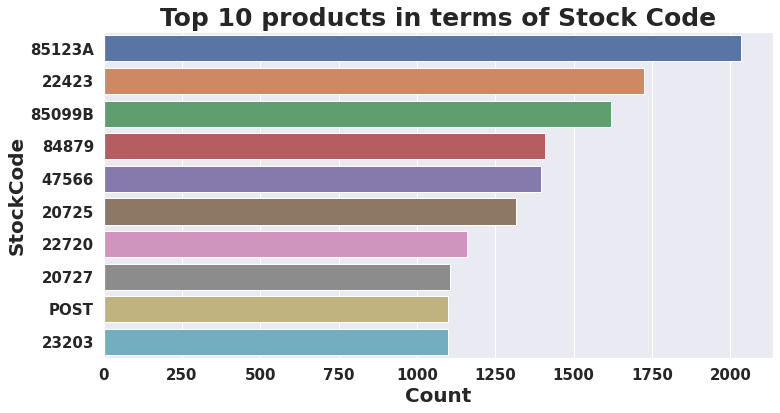

In [40]:
# top 10 product in terms of StcokCode
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_StockCodes['Count'],y=top_10_StockCodes['StockCode'])
plt.title('Top 10 products in terms of Stock Code')

In [54]:
top_10_customers=retail_df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Products_purchasing_Count'}).head(10)
top_10_customers

,CustomerID,Products_purchasing_Count
0,17841.0,7847
1,14911.0,5675
2,14096.0,5111
3,12748.0,4595
4,14606.0,2700
5,15311.0,2379
6,14646.0,2076
7,13089.0,1818
8,13263.0,1677
9,14298.0,1637


Text(0.5, 1.0, 'Top 10 frequent Customers.')

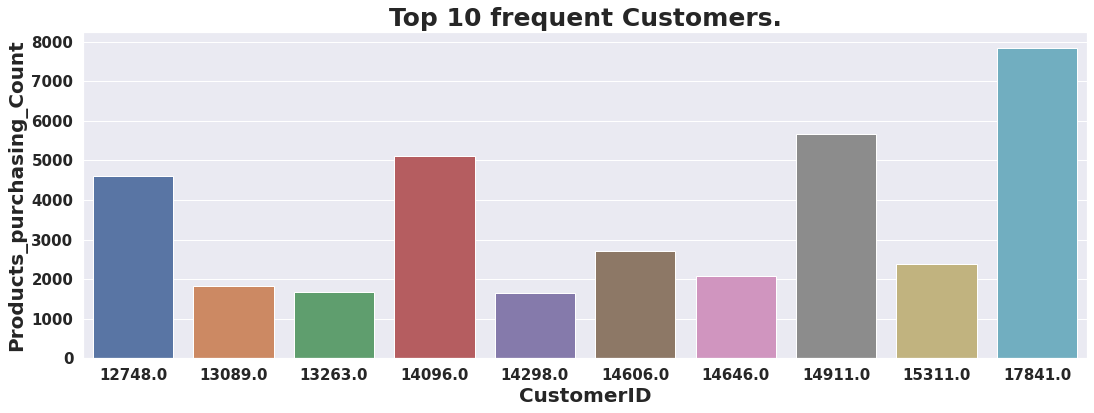

In [64]:
# Top 10 frequent Customers
plt.figure(figsize=(18,6))
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Products_purchasing_Count'].head(10))
plt.title('Top 10 frequent Customers.')

In [70]:
top_5_countries=retail_df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Customer_count'})
top_5_countries

,Country,Customer_count
0,United Kingdom,354321
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1841
8,Portugal,1462
9,Australia,1182


Text(0.5, 1.0, 'Top 5 Countries based on highest number of customers')

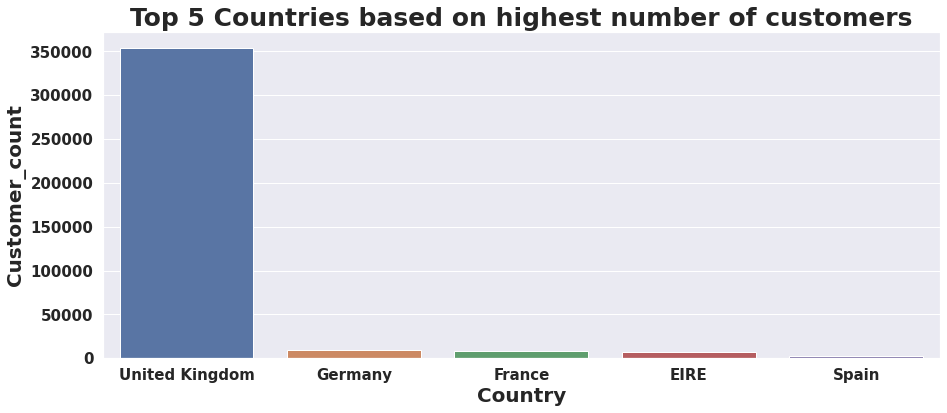

In [80]:
# top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].head(5),y=top_5_countries['Customer_count'].head(5))
plt.title('Top 5 Countries based on highest number of customers')

Text(0.5, 1.0, 'Top 5 Countries based on least number of customers ')

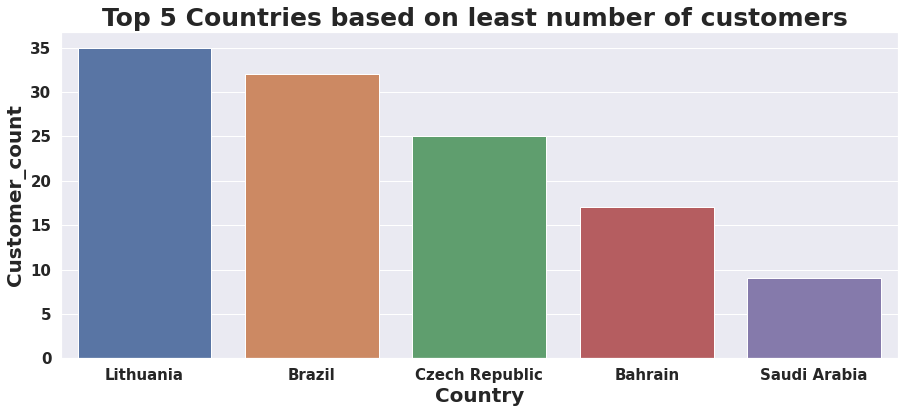

In [81]:
# top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].tail(5),y=top_5_countries['Customer_count'].tail(5))
plt.title('Top 5 Countries based on least number of customers ')

In [84]:
sales_in_month=retail_df['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month':'Sales_count'})
sales_in_month

,Month,Sales_count
0,November,64531
1,October,49554
2,December,43461
3,September,40028
4,May,28320
5,June,27185
6,March,27175
7,August,27007
8,July,26825
9,April,22642


Text(0.5, 1.0, 'Sales count in different Months ')

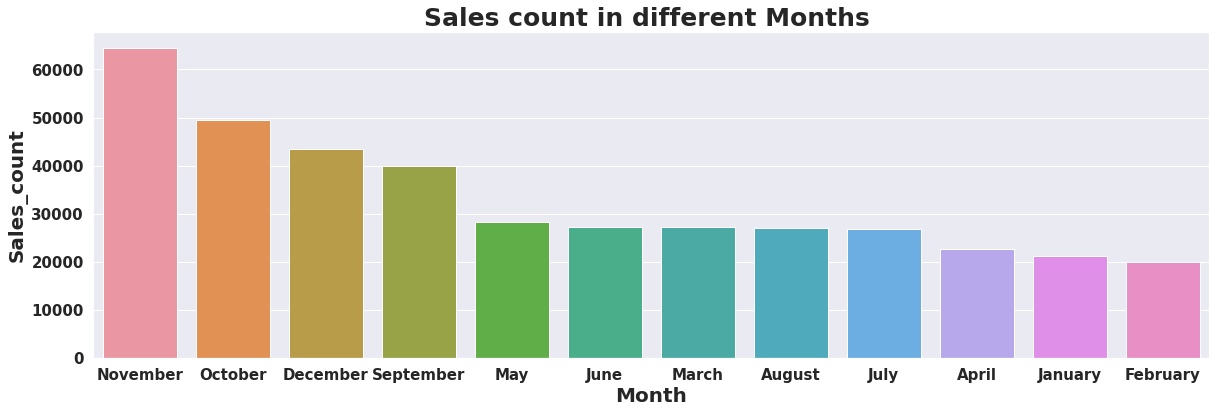

In [88]:
# Sales count in different months.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different Months ')

##**Observations**
* ***Most of the sale happened in Novmenber month.***
* ***February Month had least sales.***